In [16]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from numpy import array

In [17]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('AKAM.csv')
df1=df.reset_index()['Close']

In [18]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [20]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
# X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
# X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

if len(X_train.shape) == 2:
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
if len(X_test.shape) == 2:
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
if len(X_val.shape) == 2:
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [23]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0536 - val_loss: 0.0145
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0092 - val_loss: 0.0024
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/ste

In [25]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [26]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [27]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 98.66578155973407
Testing RMSE: 95.24659949146401


In [28]:
# 13. Dự báo 30 ngày tiếp theo
# Lấy phần dữ liệu từ ngày thứ 60 đến hết
x_input = val_data[60:].reshape(1, -1)
temp_input = list(x_input[0])  # Chuyển x_input thành list để dễ thao tác

lst30_output = []
n_steps = 100
i = 0
while (i < 30):
    if (len(temp_input) >= 100):
        # Nếu temp_input có đủ 100 phần tử, lấy 100 phần tử cuối cùng để dự báo
        x_input = np.array(temp_input[-100:])
        x_input = x_input.reshape((1, n_steps, 1))
        
        # Dự báo giá trị tiếp theo
        yhat = model.predict(x_input, verbose=0)
        
        # Cập nhật temp_input và lst_output
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]  # Loại bỏ phần tử đầu tiên để duy trì kích thước 100 phần tử
        lst30_output.extend(yhat.tolist())
        i += 1
    else:
        # Nếu temp_input chưa đủ 100 phần tử, sử dụng tất cả các giá trị hiện có để dự báo
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        
        # Cập nhật temp_input và lst_output
        temp_input.extend(yhat[0].tolist())
        lst30_output.extend(yhat.tolist())
        i += 1

# lst_output bây giờ chứa 30 giá trị dự báo tiếp theo
print(lst30_output)


[[0.38894525170326233], [0.39160671830177307], [0.41528502106666565], [0.406317800283432], [0.4178812801837921], [0.40532582998275757], [0.4125855267047882], [0.4233229458332062], [0.4443608820438385], [0.4610079824924469], [0.4753744900226593], [0.5096248388290405], [0.5153987407684326], [0.5448933243751526], [0.5442233085632324], [0.5597823262214661], [0.5555226802825928], [0.5558300018310547], [0.5397790670394897], [0.5149062871932983], [0.48786461353302], [0.45828238129615784], [0.43869468569755554], [0.43118444085121155], [0.43624699115753174], [0.4444568455219269], [0.4547630548477173], [0.453670859336853], [0.4619082510471344], [0.4724019467830658]]


In [29]:
# 13. Dự báo 60 ngày tiếp theo
# Lấy phần dữ liệu từ ngày thứ 60 đến hết
x_input = val_data[60:].reshape(1, -1)
temp_input = list(x_input[0])  # Chuyển x_input thành list để dễ thao tác

lst60_output = []
n_steps = 100
i = 0
while (i < 60):
    if (len(temp_input) >= 100):
        # Nếu temp_input có đủ 100 phần tử, lấy 100 phần tử cuối cùng để dự báo
        x_input = np.array(temp_input[-100:])
        x_input = x_input.reshape((1, n_steps, 1))
        
        # Dự báo giá trị tiếp theo
        yhat = model.predict(x_input, verbose=0)
        
        # Cập nhật temp_input và lst_output
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]  # Loại bỏ phần tử đầu tiên để duy trì kích thước 100 phần tử
        lst60_output.extend(yhat.tolist())
        i += 1
    else:
        # Nếu temp_input chưa đủ 100 phần tử, sử dụng tất cả các giá trị hiện có để dự báo
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        
        # Cập nhật temp_input và lst_output
        temp_input.extend(yhat[0].tolist())
        lst60_output.extend(yhat.tolist())
        i += 1

# lst_output bây giờ chứa 30 giá trị dự báo tiếp theo
print(lst60_output)


[[0.38894525170326233], [0.39160671830177307], [0.41528502106666565], [0.406317800283432], [0.4178812801837921], [0.40532582998275757], [0.4125855267047882], [0.4233229458332062], [0.4443608820438385], [0.4610079824924469], [0.4753744900226593], [0.5096248388290405], [0.5153987407684326], [0.5448933243751526], [0.5442233085632324], [0.5597823262214661], [0.5555226802825928], [0.5558300018310547], [0.5397790670394897], [0.5149062871932983], [0.48786461353302], [0.45828238129615784], [0.43869468569755554], [0.43118444085121155], [0.43624699115753174], [0.4444568455219269], [0.4547630548477173], [0.453670859336853], [0.4619082510471344], [0.4724019467830658], [0.47903069853782654], [0.49031493067741394], [0.489344984292984], [0.49964556097984314], [0.5004884004592896], [0.5096548795700073], [0.5122169256210327], [0.5209219455718994], [0.5211007595062256], [0.5257951021194458], [0.5314794182777405], [0.53836590051651], [0.5472351312637329], [0.5509268641471863], [0.5589474439620972], [0.56

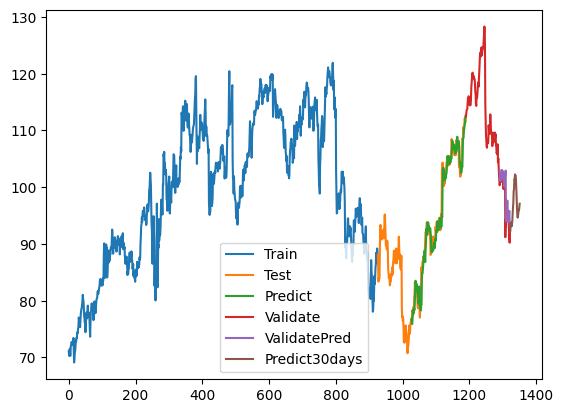

In [30]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst30_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()